#<font color="E3D081"><h1 style="border=20px"><b>*Fashion MNIST Dataset* </font>




# <font color='#EADCA0'><h2>Library Used</font>


In [77]:
import pandas as pd
from google.colab import drive
import gdown
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import shutil
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import resample
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns


#<font color="#EADCA0"><b><h2>Uploud The Data on My Drive </font>

In [2]:
# Open My Drive
drive.mount('/content/drive')
# Catch the Dataset
folder_path = '/content/drive/MyDrive/Fashion MNIST Dataset'
files = os.listdir(folder_path)

for file in files:
    print(file)


Mounted at /content/drive
fashion-mnist_test.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
fashion-mnist_train.csv
train-images-idx3-ubyte
train-labels-idx1-ubyte


# <font color ="#EADCA0"><h2>visualization data</font>

In [3]:
# Path to the CSV files
train_csv_path = '/content/drive/MyDrive/Fashion MNIST Dataset/fashion-mnist_train.csv'
test_csv_path = '/content/drive/MyDrive/Fashion MNIST Dataset/fashion-mnist_test.csv'

# Load the CSV files
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [4]:
train_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [6]:
test_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


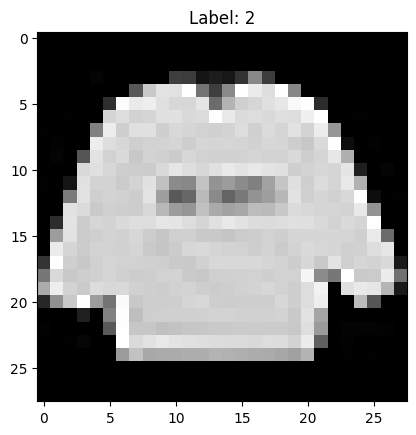

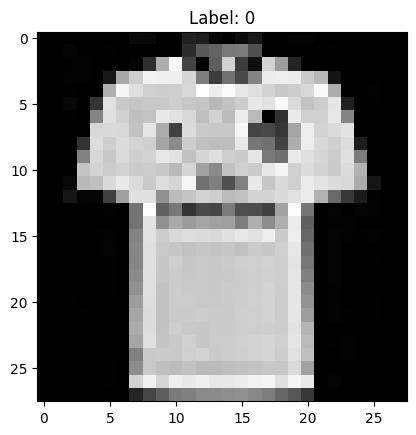

In [5]:
# Visualize an image from the dataset
def show_image_from_pixels(pixels, label):

    image = np.array(pixels, dtype='uint8').reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()

#First image from the training data
first_row = train_data.iloc[0]
label = first_row['label']
pixels = first_row.drop('label').values  # Drop the label column and get the pixel values

show_image_from_pixels(pixels, label)

# Example: Show the first image from the test data
first_row_test = test_data.iloc[0]
label_test = first_row_test['label']
pixels_test = first_row_test.drop('label').values  # Drop the label column and get the pixel values

show_image_from_pixels(pixels_test, label_test)


 # <font color="EADCA0"><h2>Split data based on Labels</font>
 <font color="E8D896">Collect pixels to convert them into a PNG image to facilitate the splitting process<font>

In [9]:
output_folder = '/content/Organized_Train_Data'
os.makedirs(output_folder, exist_ok=True)

X_train= train_data.drop('label', axis=1).values
y_train = train_data['label'].values

# Create a directory for each label
labels = np.unique(y_train)
for label in labels:
    os.makedirs(os.path.join(output_folder, str(label)), exist_ok=True)

# Save each image
for i in tqdm(range(len(X_train))):
    img = X_train[i].reshape(28, 28)
    label = y_train[i]

    # Define the filename and path
    filename = f'image_{i}.png'
    filepath = os.path.join(output_folder, str(label), filename)

    # Save the image
    cv2.imwrite(filepath, (img * 255).astype(np.uint8))


100%|██████████| 60000/60000 [00:13<00:00, 4587.54it/s]


In [16]:
output_folder = '/content/Organized_Train_Data'

labels = os.listdir(output_folder)

image_counts = {}

for label in labels:
    label_folder = os.path.join(output_folder, label)

    num_images = len(os.listdir(label_folder))

    image_counts[label] = num_images

# Print the number of images for each label
for label, count in image_counts.items():
    print(f"Label {label}: {count} images")

Label 4: 6000 images
Label 7: 6000 images
Label 8: 6000 images
Label 6: 6000 images
Label 1: 6000 images
Label 3: 6000 images
Label 9: 6000 images
Label 0: 6000 images
Label 5: 6000 images
Label 2: 6000 images


In [15]:
# Define paths
output_folder = '/content/Organized_Test_Data'
os.makedirs(output_folder, exist_ok=True)

X_test= test_data.drop('label', axis=1).values
y_test = test_data['label'].values
# Create a directory for each label
labels = np.unique(y_test)
for label in labels:
    os.makedirs(os.path.join(output_folder, str(label)), exist_ok=True)

# Save each image
for i in tqdm(range(len(X_test))):
    img = X_test[i].reshape(28, 28)
    label = y_test[i]

    # Define the filename and path
    filename = f'image_{i}.png'
    filepath = os.path.join(output_folder, str(label), filename)

    # Save the image
    cv2.imwrite(filepath, (img * 255).astype(np.uint8))


100%|██████████| 10000/10000 [00:01<00:00, 5734.92it/s]


In [17]:
output_folder = '/content/Organized_Test_Data'

labels = os.listdir(output_folder)

image_counts = {}

for label in labels:
    label_folder = os.path.join(output_folder, label)

    num_images = len(os.listdir(label_folder))

    image_counts[label] = num_images

# Print the number of images for each label
for label, count in image_counts.items():
    print(f"Label {label}: {count} images")

Label 4: 1000 images
Label 7: 1000 images
Label 8: 1000 images
Label 6: 1000 images
Label 1: 1000 images
Label 3: 1000 images
Label 9: 1000 images
Label 0: 1000 images
Label 5: 1000 images
Label 2: 1000 images


#<font color="EADCA0"><h2>Split Train data to ---->>>> Train and Validation</font>

In [19]:
base_train_folder = '/content/Organized_Train_Data'
base_val_folder = '/content/Organized_Val_Data'

for label in os.listdir(base_train_folder):
    os.makedirs(os.path.join(base_val_folder, label), exist_ok=True)


def split_data(train_folder, val_folder, split_ratio=0.2):
    for label in os.listdir(train_folder):
        label_train_folder = os.path.join(train_folder, label)
        label_val_folder = os.path.join(val_folder, label)

        # List all files
        files = os.listdir(label_train_folder)

        # Move to validation
        num_files = len(files)
        num_val_files = int(num_files * split_ratio)

        val_files = random.sample(files, num_val_files)

        # Move files to validation folder
        for file in val_files:
            src = os.path.join(label_train_folder, file)
            dst = os.path.join(label_val_folder, file)
            shutil.move(src, dst)


split_data(base_train_folder, base_val_folder, split_ratio=0.2)


In [20]:
labels = os.listdir(base_val_folder)

image_counts = {}

for label in labels:
    label_folder = os.path.join(base_val_folder, label)

    num_images = len(os.listdir(label_folder))

    image_counts[label] = num_images

# Print the number of images for each label
for label, count in image_counts.items():
    print(f"Label {label}: {count} images")

Label 4: 1200 images
Label 7: 1200 images
Label 8: 1200 images
Label 6: 1200 images
Label 1: 1200 images
Label 3: 1200 images
Label 9: 1200 images
Label 0: 1200 images
Label 5: 1200 images
Label 2: 1200 images


In [21]:
labels = os.listdir(base_train_folder)

image_counts = {}

for label in labels:
    label_folder = os.path.join(base_train_folder, label)

    num_images = len(os.listdir(label_folder))

    image_counts[label] = num_images

# Print the number of images for each label
for label, count in image_counts.items():
    print(f"Label {label}: {count} images")

Label 4: 4800 images
Label 7: 4800 images
Label 8: 4800 images
Label 6: 4800 images
Label 1: 4800 images
Label 3: 4800 images
Label 9: 4800 images
Label 0: 4800 images
Label 5: 4800 images
Label 2: 4800 images


# <font color="EADCA0"> <h2>Create Deep neural networks (DNN) and Convolutional neural networks(CNN) Function</font>

In [36]:
# Image parameters
img_height, img_width = 28, 28
batch_size = 32
num_classes = 10
base_test_folder ="/content/Organized_Test_Data"


In [41]:
def create_data_generators():
    val_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)


    val_generator = val_datagen.flow_from_directory(
        base_val_folder,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale'
    )

    test_generator = test_datagen.flow_from_directory(
        base_test_folder,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
        color_mode='grayscale'
    )

    return val_generator, test_generator
# Implementing Deep neural networks( Dence )
def create_dnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(img_height, img_width, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
#  Implementing CNN Convolutional neural networks
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


#<font color="EADCA0"> <h2>Make a bootstrapping on validation data on model DNN and CNN </font>

In [48]:
def bootsrbing_ensemble(n_estimators=5, sample_size=0.8, epochs=5):
    val_generator, test_generator = create_data_generators()

    # Load all validation data into memory
    val_data = []
    val_labels = []
    for batch in val_generator:
        val_data.append(batch[0])
        val_labels.append(batch[1])
        if len(val_data) * batch_size >= val_generator.n:
            break
    val_data = np.concatenate(val_data)
    val_labels = np.concatenate(val_labels)

    ensemble_predictions = []
    dnn_accuracies = []
    cnn_accuracies = []

    for i in range(n_estimators):
        print(f"Training models for estimator {i+1}/{n_estimators}")

        # Create a bootstrapped dataset from validation data
        X, y = resample(val_data, val_labels,
                        n_samples=int(len(val_data) * sample_size))

        # Train DNN model
        dnn_model = create_dnn_model()
        print("Training DNN model")
        dnn_model.fit(X, y, epochs=epochs, verbose=1)

        # Train CNN model
        cnn_model = create_cnn_model()
        print("Training CNN model")
        cnn_model.fit(X, y, epochs=epochs, verbose=1)

        # Make predictions
        dnn_predictions = dnn_model.predict(test_generator)
        cnn_predictions = cnn_model.predict(test_generator)

        # Calculate accuracy for DNN
        dnn_accuracy = np.mean(np.argmax(dnn_predictions, axis=1) == test_generator.classes)
        dnn_accuracies.append(dnn_accuracy)

        # Calculate accuracy for CNN
        cnn_accuracy = np.mean(np.argmax(cnn_predictions, axis=1) == test_generator.classes)
        cnn_accuracies.append(cnn_accuracy)

        # Average predictions from DNN and CNN
        avg_predictions = (dnn_predictions + cnn_predictions) / 2
        ensemble_predictions.append(avg_predictions)

    # Average predictions from all estimators
    final_predictions = np.mean(ensemble_predictions, axis=0)

    # Calculate ensemble accuracy
    ensemble_accuracy = np.mean(np.argmax(final_predictions, axis=1) == test_generator.classes)

    return ensemble_accuracy, final_predictions, dnn_accuracies, cnn_accuracies

In [50]:
ensemble_accuracy, predictions, dnn_accuracies, cnn_accuracies = bootsrbing_ensemble(n_estimators=3, sample_size=0.8, epochs=5)

# Print the results
print("Ensemble Accuracy:", ensemble_accuracy)


Found 12000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.
Training models for estimator 1/3
Training DNN model
Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4979 - loss: 1.3883
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7460 - loss: 0.7239
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8167 - loss: 0.5375
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8556 - loss: 0.4329
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8889 - loss: 0.3343
Training CNN model
Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.5778 - loss: 1.1663
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.8059 - loss: 0.5323
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.8382 - loss: 0.4341
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8694 - loss: 0.3551
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
Training models for estimator 2/3
Training DNN model
Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5040 - loss: 1.3815
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7576 - loss: 0.7105
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8135 - loss: 0.5495
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8488 - loss: 0.4449
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8835 - loss: 0.3417
Training CNN model
Epoch 1/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5851 - loss: 1.1838
Epoch 2/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7979 - loss: 0.5450
Epoch 3/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8415 - loss: 0.4407
Epoch 4/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8604 - loss: 0.3641
Epoch 5/5
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8784 

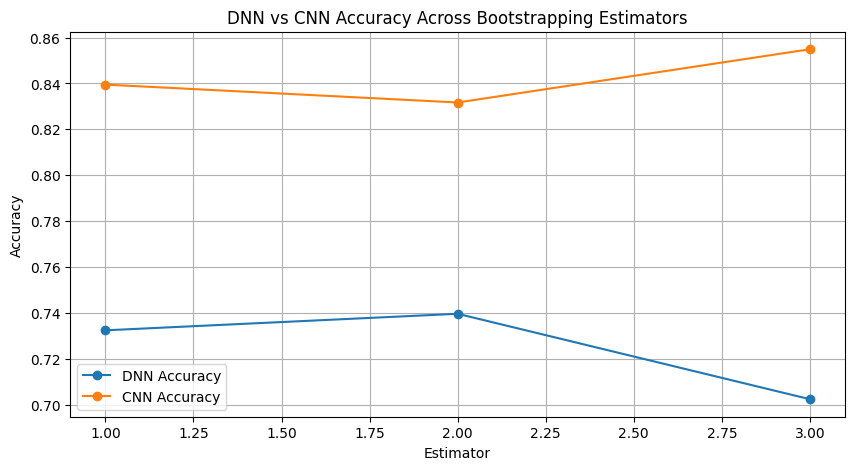

In [51]:
# Plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(dnn_accuracies) + 1), dnn_accuracies, label='DNN Accuracy', marker='o')
plt.plot(range(1, len(cnn_accuracies) + 1), cnn_accuracies, label='CNN Accuracy', marker='o')
plt.title('DNN vs CNN Accuracy Across Bootstrapping Estimators')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#<font color="EADCA0"> <h2>Make  Implementing for Model CNN and DNN on train and validation data</font>

In [57]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    base_train_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)
val_generator = val_datagen.flow_from_directory(
    base_val_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    base_test_folder,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    color_mode='grayscale'
)

Found 48000 images belonging to 10 classes.
Found 12000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [59]:
epochs = 10
# Create and train DNN model
dnn_model = create_dnn_model()
dnn_history = dnn_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6294 - loss: 1.0150 - val_accuracy: 0.7515 - val_loss: 0.6712
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7892 - loss: 0.5795 - val_accuracy: 0.7854 - val_loss: 0.6028
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.8220 - loss: 0.4894 - val_accuracy: 0.8064 - val_loss: 0.5501
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8483 - loss: 0.4118 - val_accuracy: 0.7991 - val_loss: 0.5620
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8619 - loss: 0.3736 - val_accuracy: 0.8113 - val_loss: 0.5460
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8805 - loss: 0.3274 - val_accuracy: 0.8073 - val_loss: 0.5603
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8942 - loss: 0.2868 - val_accuracy: 0.8143 - val_loss: 0.5536
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9027 -

In [60]:
# Create and train CNN model
cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 73s 48ms/step - accuracy: 0.7395 - loss: 0.7308 - val_accuracy: 0.8577 - val_loss: 0.3845
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 43ms/step - accuracy: 0.8704 - loss: 0.3525 - val_accuracy: 0.8788 - val_loss: 0.3398
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.8906 - loss: 0.2956 - val_accuracy: 0.8882 - val_loss: 0.3073
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 43ms/step - accuracy: 0.9089 - loss: 0.2452 - val_accuracy: 0.8963 - val_loss: 0.2901
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9200 - loss: 0.2175 - val_accuracy: 0.8923 - val_loss: 0.3025
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.9290 - loss: 0.1867 - val_accuracy: 0.8918 - val_loss: 0.3177
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 47ms/step - accuracy: 0.9391 - loss: 0.1598 - val_accuracy: 0.8951 - val_loss: 0.3077
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.9464 - loss: 0.14

In [72]:
# Function to calculate precision, recall, and create confusion matrix
def evaluate_model(model, generator):
    predictions = model.predict(generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = generator.classes
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    return precision, recall, f1, cm

# Evaluate both models
dnn_precision, dnn_recall, dnn_f1, dnn_cm = evaluate_model(dnn_model, test_generator)
cnn_precision, cnn_recall, cnn_f1, cnn_cm = evaluate_model(cnn_model, test_generator)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step


In [73]:
print("\nDNN Model:")
print(f"Final Training Accuracy: {dnn_history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {dnn_history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {dnn_test_acc:.4f}")
print(f"Precision: {dnn_precision:.4f}")
print(f"Recall: {dnn_recall:.4f}")

print("\nCNN Model:")
print(f"Final Training Accuracy: {cnn_history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {cnn_history.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {cnn_test_acc:.4f}")
print(f"Precision: {cnn_precision:.4f}")
print(f"Recall: {cnn_recall:.4f}")


DNN Model:
Final Training Accuracy: 0.9191
Final Validation Accuracy: 0.8173
Test Accuracy: 0.8238
Precision: 0.7584
Recall: 0.7548

CNN Model:
Final Training Accuracy: 0.9590
Final Validation Accuracy: 0.8932
Test Accuracy: 0.9034
Precision: 0.9033
Recall: 0.9034


In [65]:
# Save models
dnn_model.save('fashion_mnist_dnn_model.h5')
cnn_model.save('fashion_mnist_cnn_model.h5')

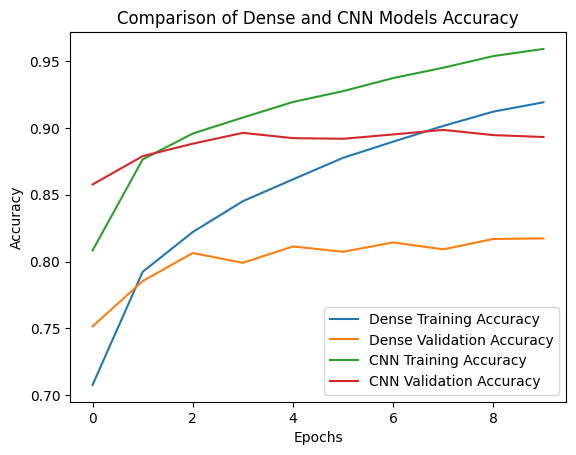

In [68]:
# Compare the number of parameters
dense_params = dnn_model.count_params()
cnn_params = cnn_model.count_params()

# Plot the accuracy for both models
plt.plot(dnn_history.history['accuracy'], label='Dense Training Accuracy')
plt.plot(dnn_history.history['val_accuracy'], label='Dense Validation Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of Dense and CNN Models Accuracy')
plt.show()



Generating plots...


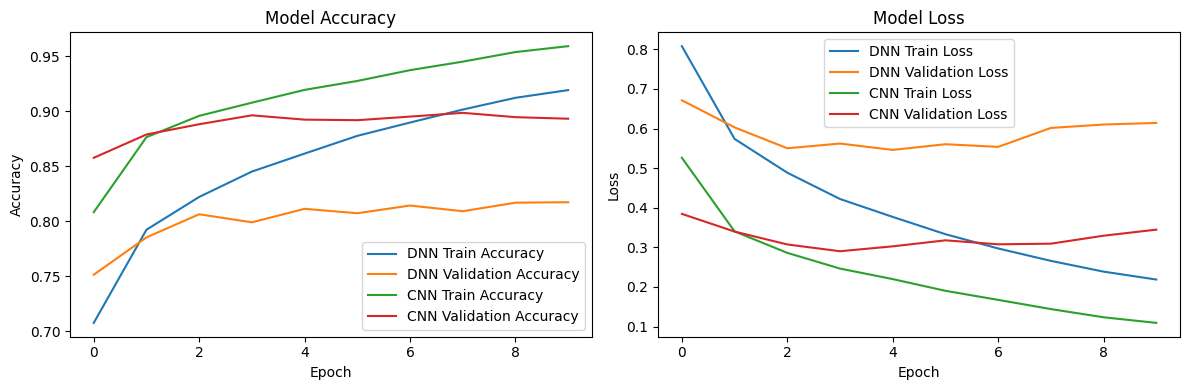

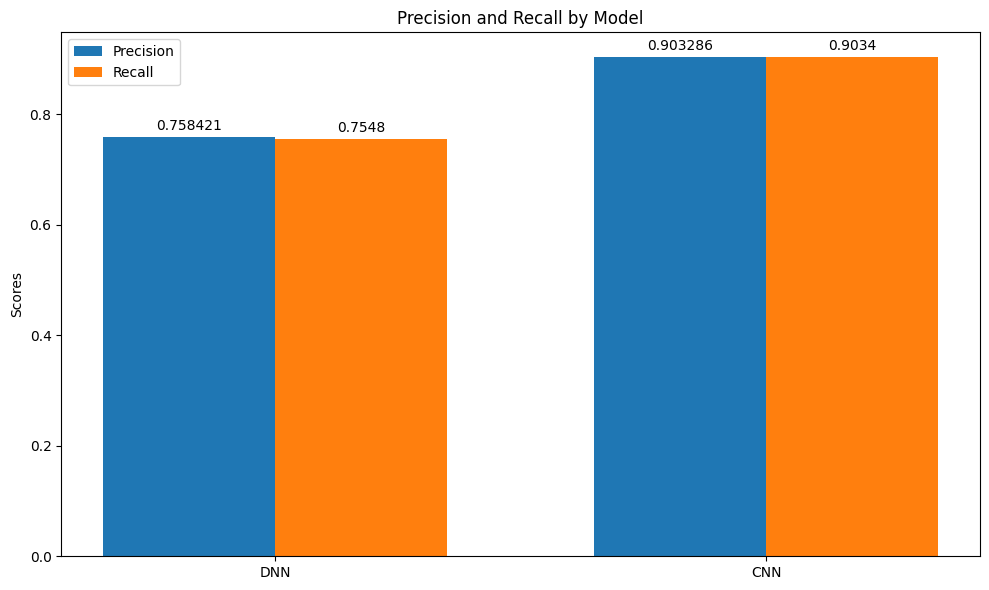

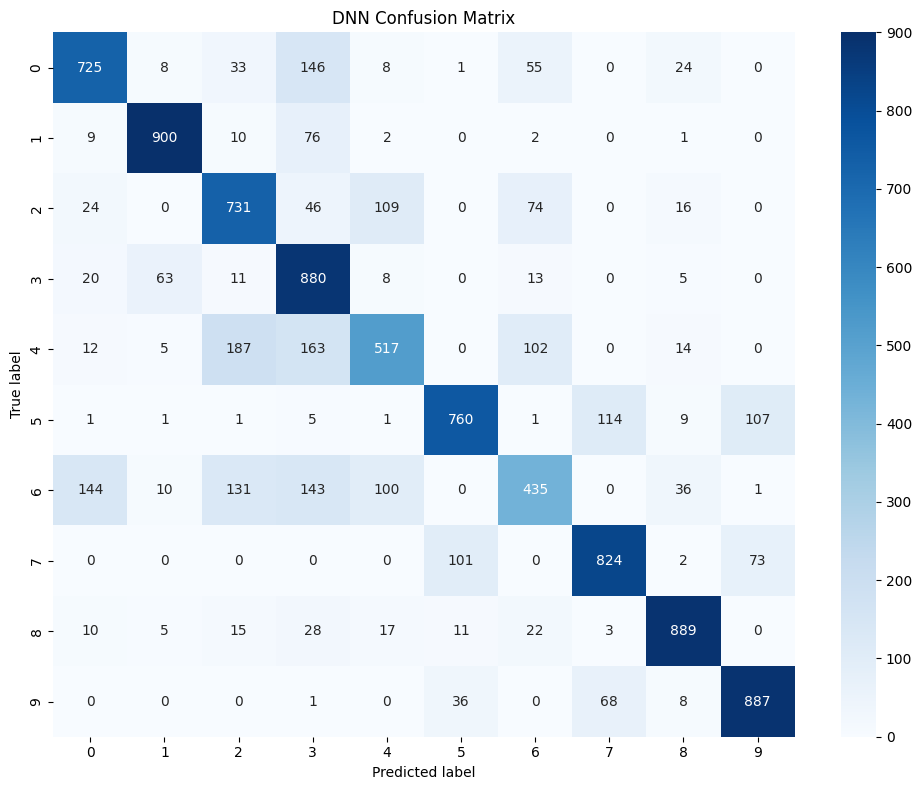

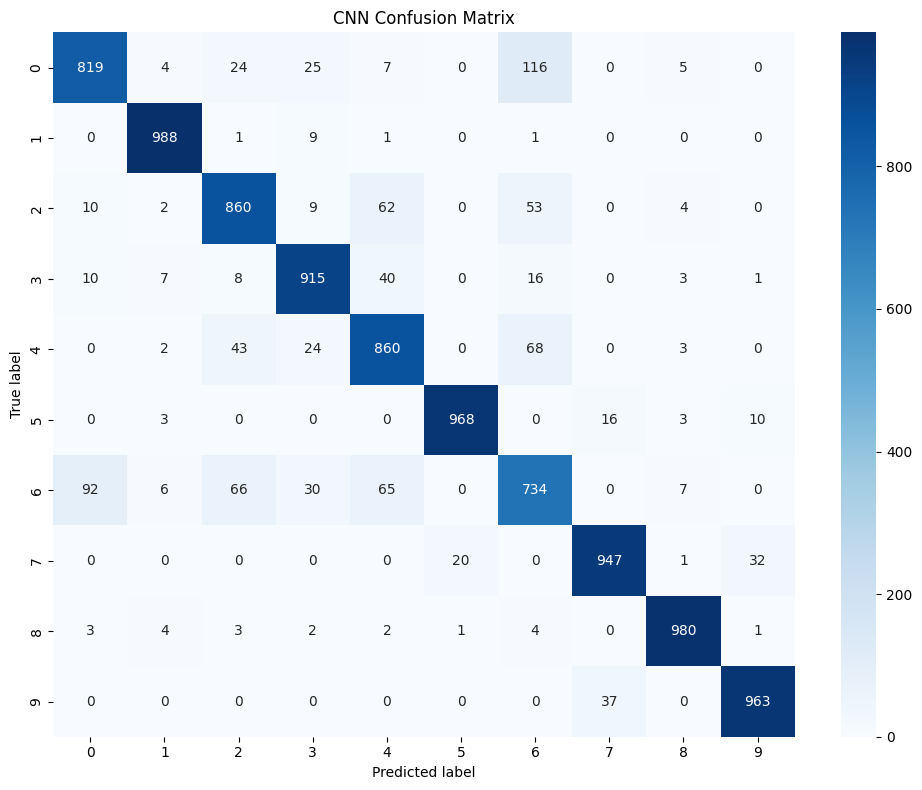

Analysis complete.


In [82]:
# Plotting functions
def plot_history(dnn_history, cnn_history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(dnn_history.history['accuracy'], label='DNN Train Accuracy')
    plt.plot(dnn_history.history['val_accuracy'], label='DNN Validation Accuracy')
    plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
    plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(dnn_history.history['loss'], label='DNN Train Loss')
    plt.plot(dnn_history.history['val_loss'], label='DNN Validation Loss')
    plt.plot(cnn_history.history['loss'], label='CNN Train Loss')
    plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_precision_recall(dnn_precision, dnn_recall, cnn_precision, cnn_recall):
    labels = ['DNN', 'CNN']
    precision = [dnn_precision, cnn_precision]
    recall = [dnn_recall, cnn_recall]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, precision, width, label='Precision')
    rects2 = ax.bar(x + width/2, recall, width, label='Recall')

    ax.set_ylabel('Scores')
    ax.set_title('Precision and Recall by Model')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.show()

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Generate plots
print("\nGenerating plots...")
plot_history(dnn_history, cnn_history)
plot_precision_recall(dnn_precision, dnn_recall, cnn_precision, cnn_recall)
plot_confusion_matrix(dnn_cm, 'DNN Confusion Matrix')
plot_confusion_matrix(cnn_cm, 'CNN Confusion Matrix')

print("Analysis complete.")